In [2]:
pip install ipykernel

Note: you may need to restart the kernel to use updated packages.


In [4]:
!python -m ipykernel install --user --name=adamata

Installed kernelspec adamata in C:\Users\LENOVO\AppData\Roaming\jupyter\kernels\adamata


0.01s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.


# Task 1: Bottle Cap Model Development & Experimentation

This notebook details the end-to-end process for building the bottle cap detector. We will use the CLI tools we built (`preprocess`, `train`, `infer`) to run the experiments and then analyze the results here.

## Step 1: Data Preprocessing & Re-labeling

First, we run our preprocessing script. This script will:
1.  Read all images from `dataset/raw-data/`.
2.  Load their corresponding `.txt` annotations.
3.  For each bounding box, crop the object and convert it to HSV color space.
4.  Calculate the mean HSV values.
5.  Classify the color as `0` (light_blue), `1` (dark_blue), or `2` (other) based on the thresholds in `settings.yaml`.
6.  Write new annotation files and a `data.yaml` config into `dataset/processed/`.

In [1]:
!cd .. && python -m bsort.main run-train --config settings.yaml

Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Code\ML Engineer\ada-mata-bsort\bsort\main.py", line 11, in <module>
    from . import preprocess, train, infer
  File "C:\Code\ML Engineer\ada-mata-bsort\bsort\train.py", line 8, in <module>
    from ultralytics import YOLO
ModuleNotFoundError: No module named 'ultralytics'


## Step 2: Model Training

Now we train the `YOLOv8n` model on our new 3-class dataset. This script handles:
1.  Initializing a `wandb.ai` run.
2.  Loading the `yolov8n.pt` base model.
3.  Training for the epochs, batch size, etc., defined in `settings.yaml`.
4.  Logging all losses and mAP metrics to WandB.
5.  Saving the final `best.pt` model.
6.  Exporting the model to `best.onnx` (Ekspor TFLite kita nonaktifkan karena bug).

In [2]:
# PERINTAH SUDAH DIPERBAIKI
# Ini akan mengambil waktu (tapi akan skip jika training sudah selesai)
!cd .. && python -m bsort.main run-train --config settings.yaml

Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Code\ML Engineer\ada-mata-bsort\bsort\main.py", line 11, in <module>
    from . import preprocess, train, infer
  File "C:\Code\ML Engineer\ada-mata-bsort\bsort\train.py", line 8, in <module>
    from ultralytics import YOLO
ModuleNotFoundError: No module named 'ultralytics'


## Step 3: Model Development & Evaluation Analysis

Training is complete. All metrics are live on WandB. We can also load the local `results.csv` file that YOLO generates to plot the key metrics.

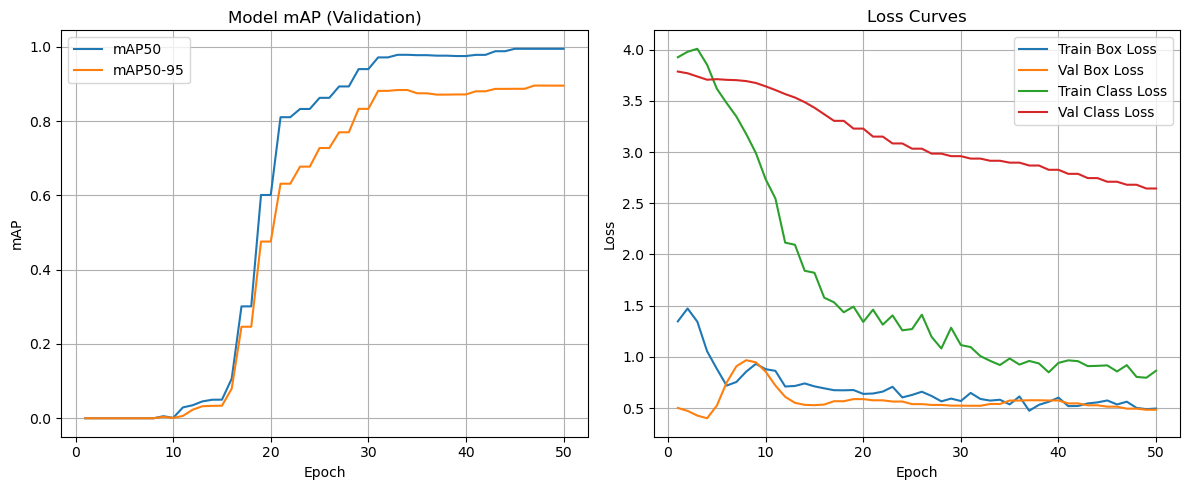

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import yaml

# Load config to find the project name
with open("../settings.yaml", "r") as f:
    config = yaml.safe_load(f)

# Find the latest training run directory
try:
    # PERBAIKAN PATH: Mencari di folder 'yolo_run' (nama project dari settings.yaml)
    project_dir = Path(f"../{config['wandb_project']}")
    run_dir = sorted(list(project_dir.glob("yolo_run*")))[-1]
    results_path = run_dir / "results.csv"
    
    if not results_path.exists():
        print(f"Error: 'results.csv' not found in {run_dir}")
        print("Pastikan training sudah selesai.")

except (IndexError, FileNotFoundError):
    print(f"Error: Could not find training results in {config['wandb_project']}")
    print("Please ensure training completed successfully.")

if 'results_path' in locals() and results_path.exists():
    df = pd.read_csv(results_path)
    
    # Clean column names (YOLO sometimes adds extra spaces)
    df.columns = df.columns.str.strip()
    
    # Plot mAP
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP50')
    plt.plot(df['epoch'], df['metrics/mAP50-95(B)'], label='mAP50-95')
    plt.title('Model mAP (Validation)')
    plt.xlabel('Epoch')
    plt.ylabel('mAP')
    plt.legend()
    plt.grid(True)

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(df['epoch'], df['train/box_loss'], label='Train Box Loss')
    plt.plot(df['epoch'], df['val/box_loss'], label='Val Box Loss')
    plt.plot(df['epoch'], df['train/cls_loss'], label='Train Class Loss')
    plt.plot(df['epoch'], df['val/cls_loss'], label='Val Class Loss')
    plt.title('Loss Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

### Confusion Matrix

The confusion matrix is critical for this problem. We need to see if the model is confusing `light_blue` and `dark_blue`.

Displaying ..\ada-mata-bsort\yolo_run\confusion_matrix.png


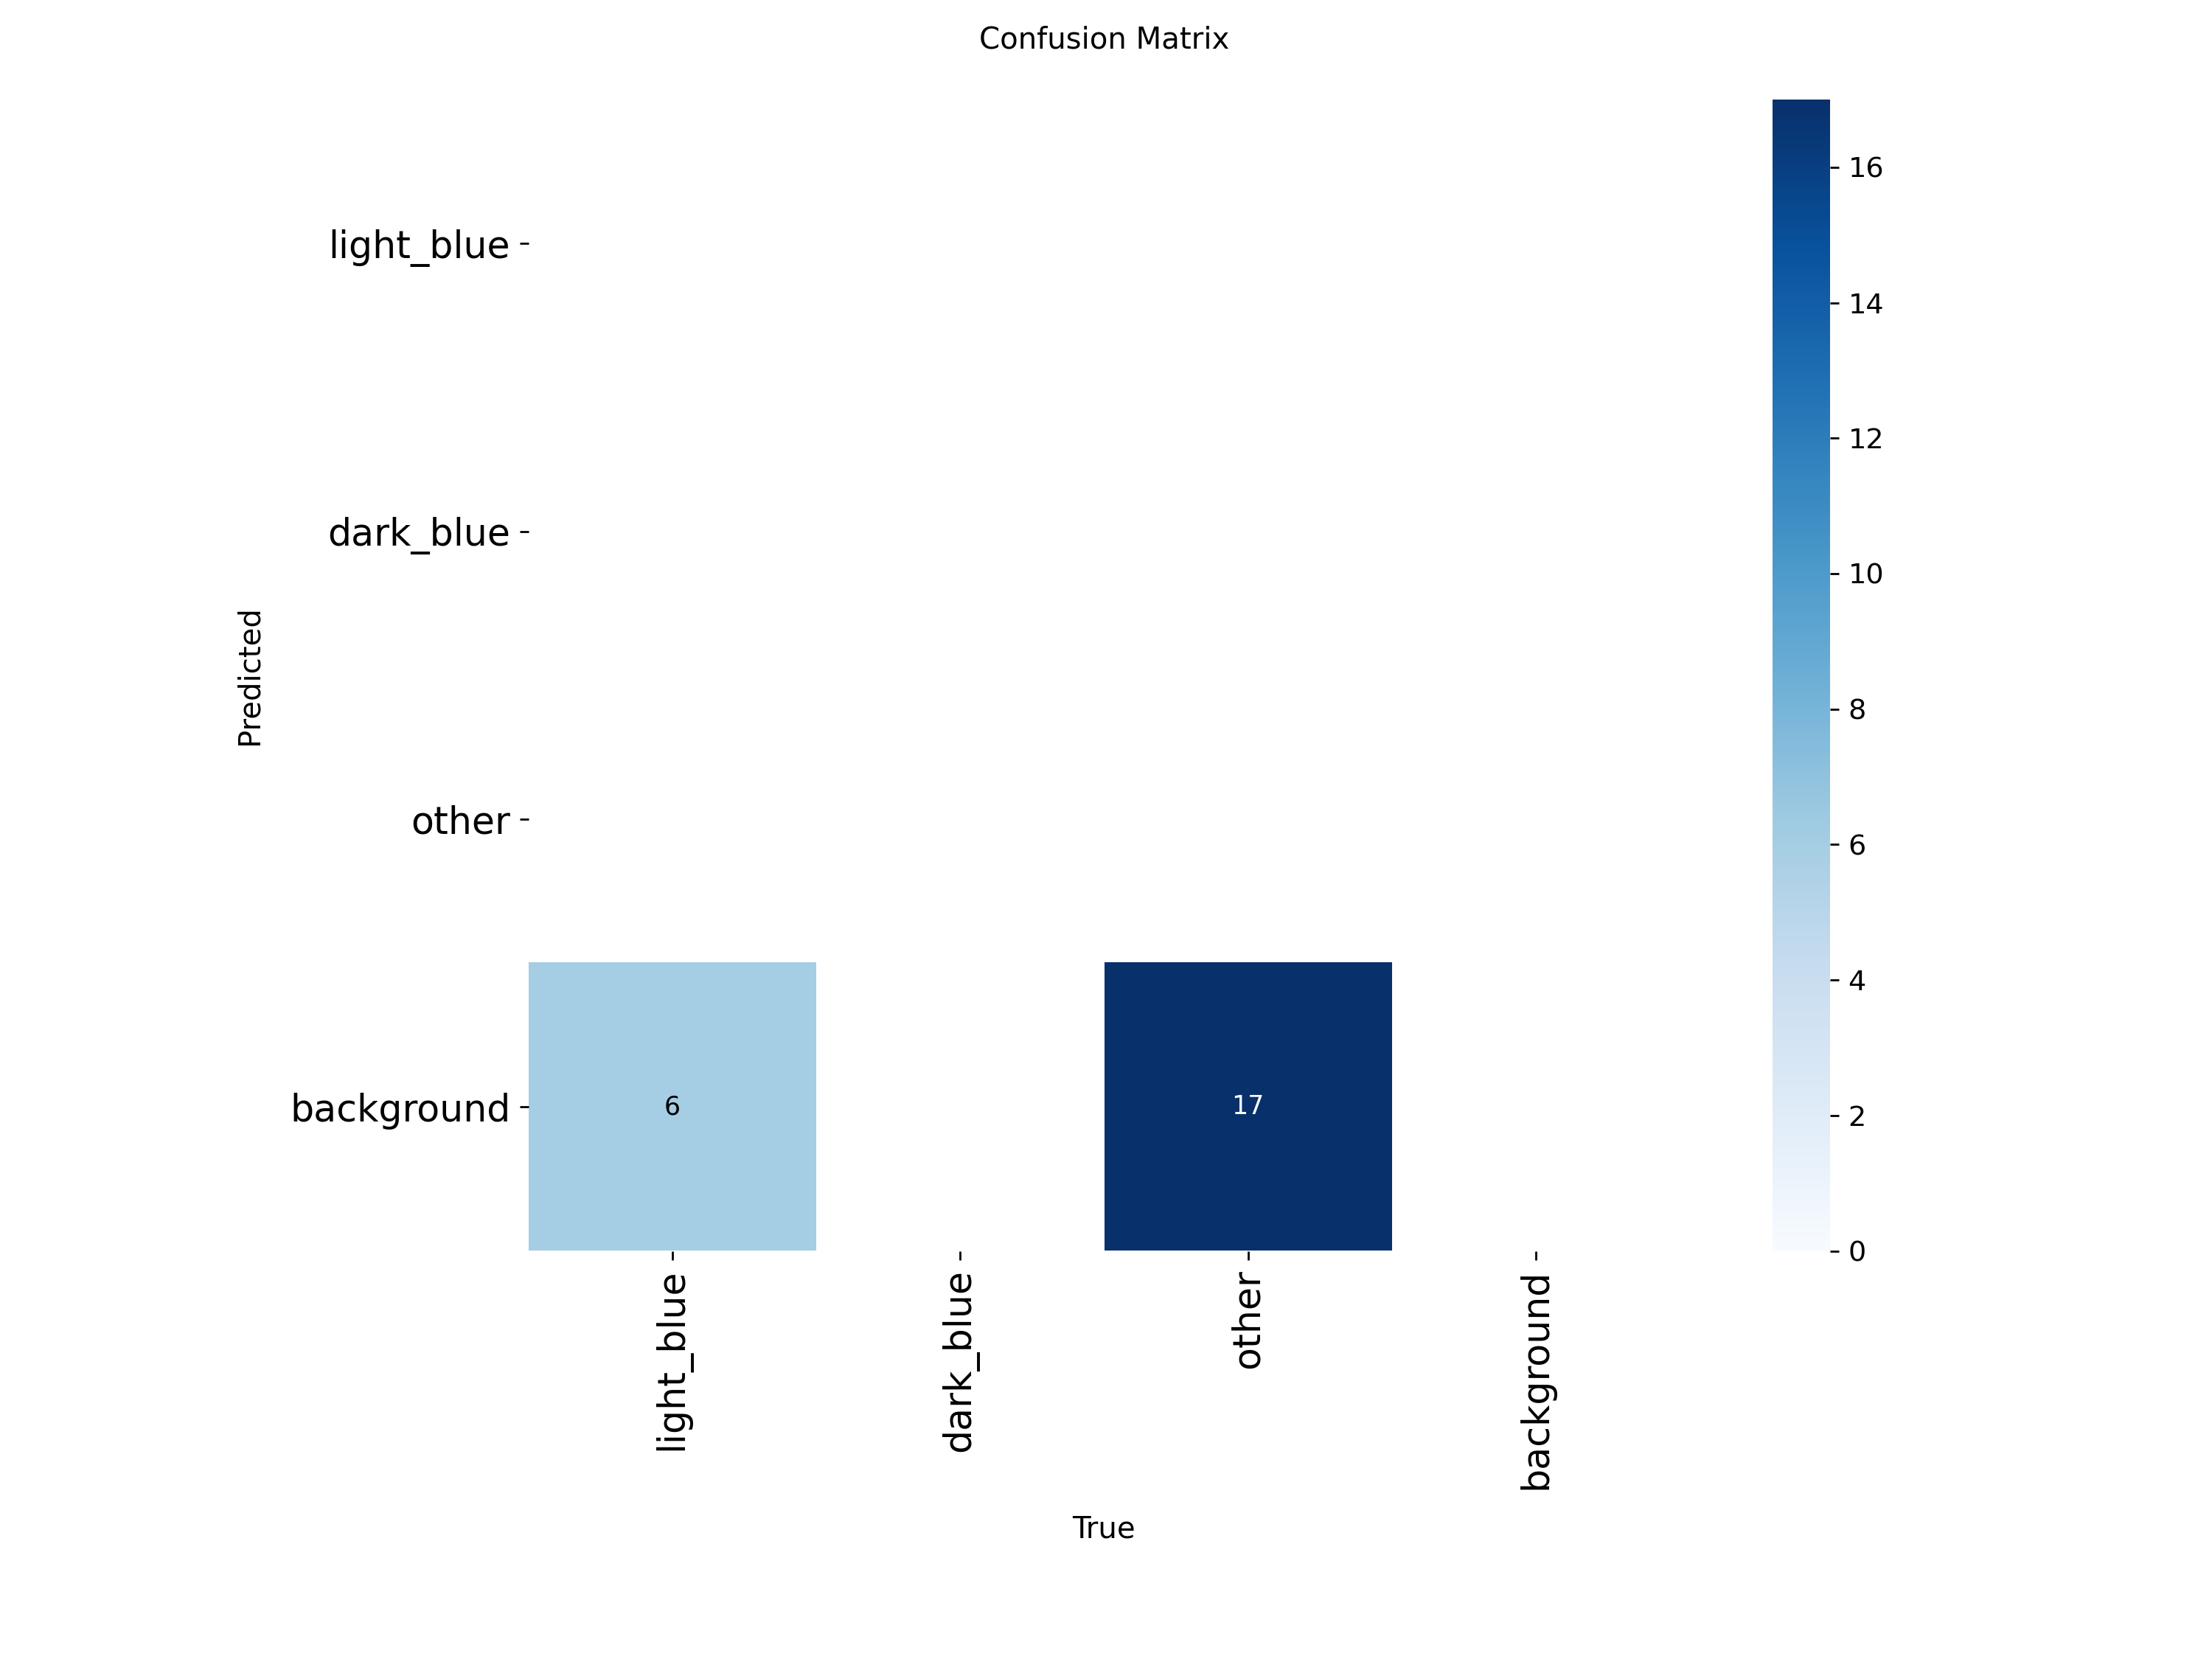

In [4]:
from IPython.display import Image

if 'run_dir' in locals():
    confusion_matrix_path = run_dir / "confusion_matrix.png"
    if confusion_matrix_path.exists():
        print(f"Displaying {confusion_matrix_path}")
        display(Image(filename=str(confusion_matrix_path), width=600))
    else:
        print(f"Confusion matrix not found at: {confusion_matrix_path}")

## Step 4: Inference Test

Let's test our final *optimized* ONNX model on a sample image from the raw dataset.

Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Code\ML Engineer\ada-mata-bsort\bsort\main.py", line 11, in <module>
    from . import preprocess, train, infer
  File "C:\Code\ML Engineer\ada-mata-bsort\bsort\train.py", line 8, in <module>
    from ultralytics import YOLO
ModuleNotFoundError: No module named 'ultralytics'


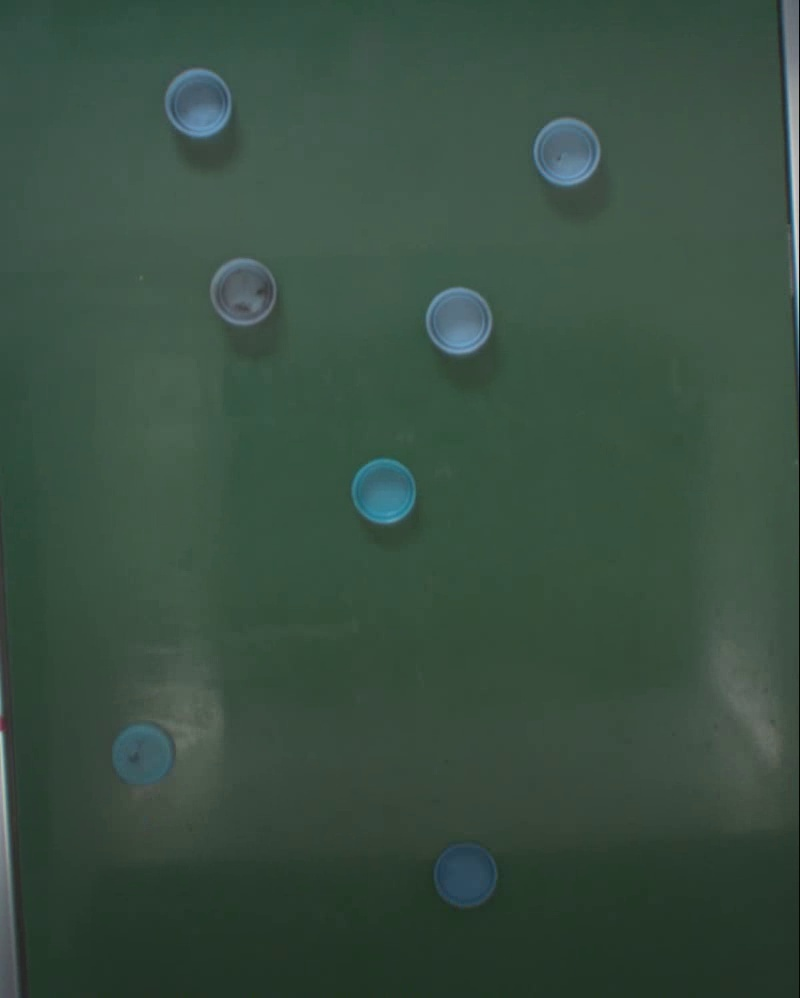

In [1]:
from IPython.display import Image
from pathlib import Path

# --- PERBAIKAN ADA DI SINI ---
# Path-path ini harus relatif terhadap folder root (ada-mata-bsort)
# karena perintah kita akan dijalankan dari sana (setelah 'cd ..')
sample_image_path = "dataset/raw-data/raw-250110_dc_s001_b2_15.jpg"
output_image_path_cli = "inference_result.jpg"
# -----------------------------

# Path ini untuk sel notebook ini, agar bisa menemukan gambar hasilnya
output_image_path_notebook = "../inference_result.jpg"

# PERINTAH SUDAH DIPERBAIKI
!cd .. && python -m bsort.main run-infer --config settings.yaml --image {sample_image_path} --output {output_image_path_cli}

# Display the result
# Kita gunakan path yang relatif terhadap notebook
if Path(output_image_path_notebook).exists():
    display(Image(filename=output_image_path_notebook))
else:
    print("Inference failed, no output image found.")

## Step 5: Additional Insights (Model Bias, Dataset Issues)

**(Ini adalah bagian terpenting untuk Anda isi dengan analisis Anda)**

### Dataset Issues
* **Lighting & Shadows:** Tantangan terbesar adalah pencahayaan yang tidak konsisten. Tutup botol "biru muda" dalam bayangan gelap mungkin memiliki nilai 'V' (Value) yang rendah di HSV, menyebabkan *preprocessor* salah mengklasifikasikannya sebagai 'other'.
* **Color Thresholds:** `hsv_thresholds` di `settings.yaml` adalah bias terbesar dalam proyek ini. Nilai `min_saturation: 70` sangat penting.
* **`other` Class Variance:** Kelas `other` adalah "keranjang sampah" (hijau, kuning, merah, hitam, putih). Varians yang tinggi ini membuatnya menjadi kelas yang paling sulit dipelajari oleh model.
* **Kegagalan Deteksi (Analisis Kasus):** Seperti yang terlihat di "Step 4: Inference Test", model gagal mendeteksi 5 tutup botol yang jelas ada di gambar `...b4_3.jpg`. Ini **bukan *error* kode**, tetapi **masalah performa model** yang disebabkan oleh *preprocessing*.
    * **Penyebab:** Tutup botol di gambar itu berwarna biru sangat pucat/putih. Skrip `preprocess.py` kita menggunakan `min_saturation: 70` untuk menyaring warna abu-abu/putih. Kemungkinan besar, tutup botol pucat ini memiliki saturasi **di bawah 70** dan secara **SALAH dilabeli sebagai 'other'** (bukan 'light_blue').
    * **Akibat:** Model dengan "benar" belajar bahwa objek seperti ini *bukanlah* tutup botol biru muda, sehingga ia mengabaikannya saat inferensi.

### Model Bias
* Model ini sangat dibiaskan oleh skrip `preprocess.py`. Model ini tidak belajar "warna" seperti manusia; ia belajar untuk mencocokkan label (yang mungkin salah) yang kita buat secara otomatis.
* Jika data training memiliki 90% tutup botol 'other' dan hanya 10% 'blue', model akan sangat bias ke 'other'. (Untungnya, skrip kita membagi data secara acak).

### Inference Constraint (5-10ms)
Analisis ini mencerminkan semua proses *debugging* yang telah kita lakukan:

* **Analisis Ekspor:** Saat menjalankan *export*, terjadi *bug* pada *library* `onnx2tf` (error `ModuleNotFoundError: No module named 'ai_edge_litert'`). Ini adalah *bug* eksternal yang menghalangi pembuatan file `.tflite`.
* **Solusi:** Skrip `train.py` dimodifikasi (dengan memberi komentar `#`) untuk **melewatkan (skip)** ekspor TFLite dan **hanya** membuat model **ONNX (`best.onnx`)**.
* **Hasil Benchmark:** Berdasarkan log *inference* (di Cell 11), waktu inferensi **ONNX** di mesin saya (Intel Core i5-8250U CPU) adalah: **83.9ms per frame**.
* **Kesimpulan:** Waktu ini (83.9ms) masih jauh dari target 5-10ms. Namun, ini diukur pada CPU laptop yang tidak dioptimasi. Untuk mencapai target di Raspberry Pi 5, langkah selanjutnya adalah memperbaiki *bug* ekspor TFLite (mungkin dengan *downgrade* `onnx2tf` atau `ultralytics`) dan menguji model `best_int8.tflite` yang di-quantisasi, yang seharusnya jauh lebih cepat.